Verteilungsschätzung für Spalte Hour1:
Mittelwert: 0.02361813703681962
Standardabweichung: 0.20950624946142926
Geschätzte Verteilung: Normalverteilung mit Mittelwert 0.02361813703681962 und Standardabweichung 0.20950624946142926
Verteilungsschätzung für Spalte Hour2:
Mittelwert: -0.009670830919555635
Standardabweichung: 0.18893065880965518
Geschätzte Verteilung: Normalverteilung mit Mittelwert -0.009670830919555635 und Standardabweichung 0.18893065880965518
Verteilungsschätzung für Spalte Hour3:
Mittelwert: 9.710070807217987e-05
Standardabweichung: 0.17771392060945834
Geschätzte Verteilung: Normalverteilung mit Mittelwert 9.710070807217987e-05 und Standardabweichung 0.17771392060945834
Verteilungsschätzung für Spalte Hour4:
Mittelwert: 0.009554433259359207
Standardabweichung: 0.17147019265888683
Geschätzte Verteilung: Normalverteilung mit Mittelwert 0.009554433259359207 und Standardabweichung 0.17147019265888683
Verteilungsschätzung für Spalte Hour5:
Mittelwert: 0.020008785914142548
St

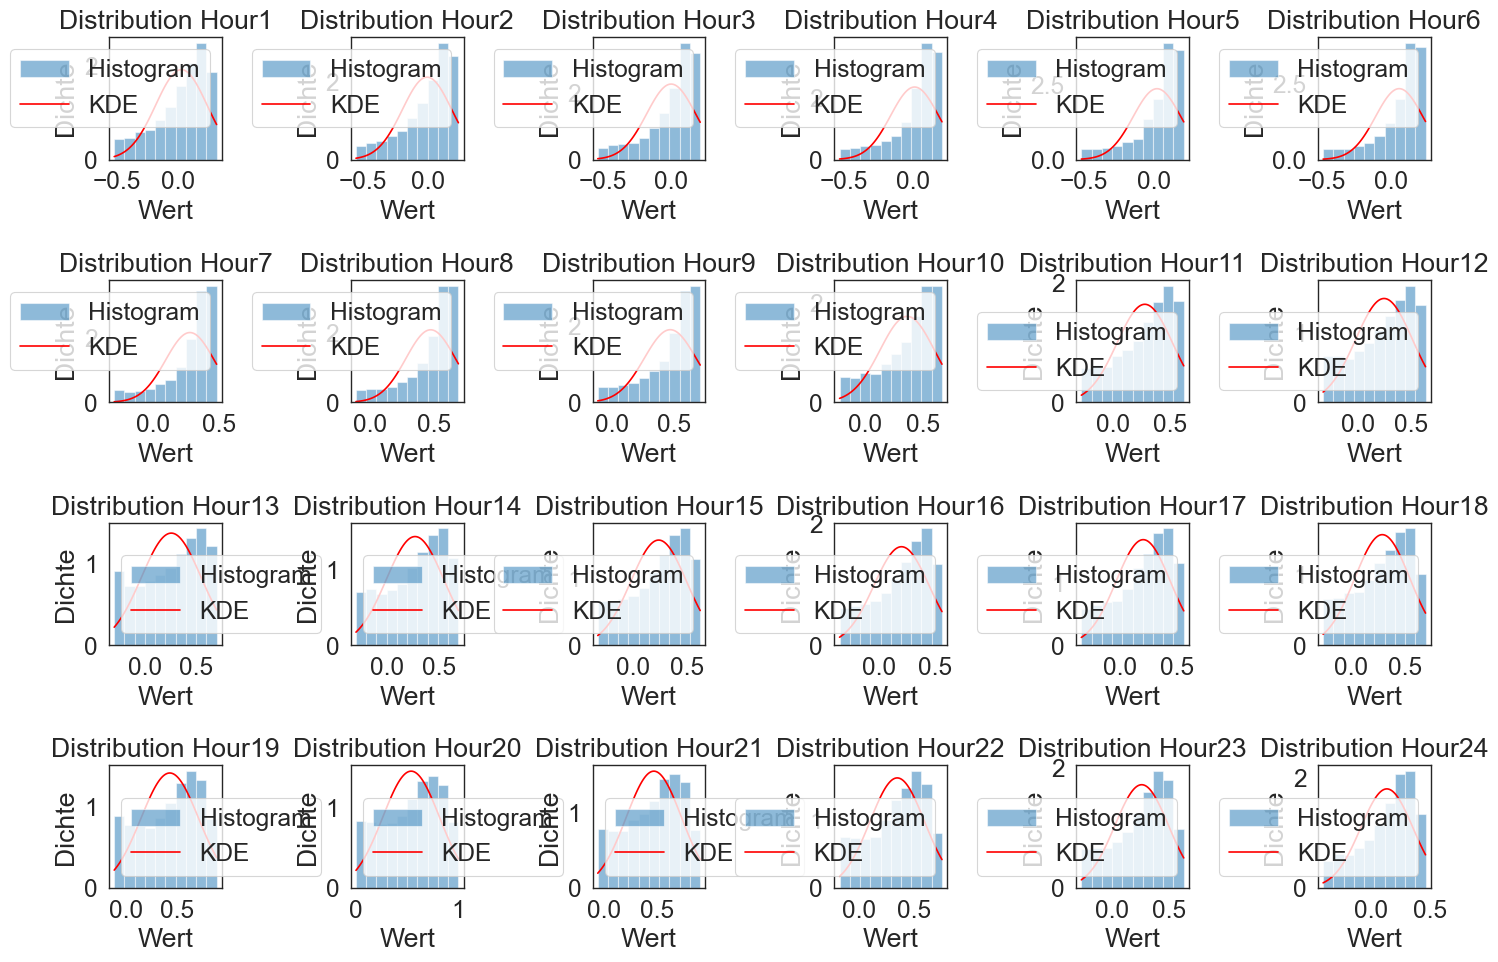

In [87]:
#Normalverteilungsapproximation
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from openpyxl import load_workbook

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    kde = np.histogram(df[col], density=True)
    
    # Mittelwert und Standardabweichung
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    
    # KDE-Plot
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    kde_values = norm.pdf(x_axis, loc=mean, scale=std)
    axs[row_idx, col_idx].plot(x_axis, kde_values, 'r-', label='KDE')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Normalverteilung mit Mittelwert {} und Standardabweichung {}'.format(mean, std))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Distribution {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()


Verteilungsschätzung für Spalte Hour1:
Mittelwert: 0.22513874753731888
Standardabweichung: 0.1789877413194889
Geschätzte Verteilung: Beta-Verteilung mit Parametern a=1.0829710631662561, b=3.6796421489274107, loc=0, scale=1
Verteilungsschätzung für Spalte Hour2:
Mittelwert: 0.20696183842140972
Standardabweichung: 0.19807142033675285
Geschätzte Verteilung: Beta-Verteilung mit Parametern a=0.8938204880800287, b=3.23771755147544, loc=0, scale=1
Verteilungsschätzung für Spalte Hour3:
Mittelwert: 0.1984109809881714
Standardabweichung: 0.1985305599994378
Geschätzte Verteilung: Beta-Verteilung mit Parametern a=0.8719831679925745, b=3.2822426539591043, loc=0, scale=1
Verteilungsschätzung für Spalte Hour4:
Mittelwert: 0.19427214395705927
Standardabweichung: 0.19876147160343297
Geschätzte Verteilung: Beta-Verteilung mit Parametern a=0.847891640671523, b=3.257962950569646, loc=0, scale=1
Verteilungsschätzung für Spalte Hour5:
Mittelwert: 0.19404244314814703
Standardabweichung: 0.19439926713730804


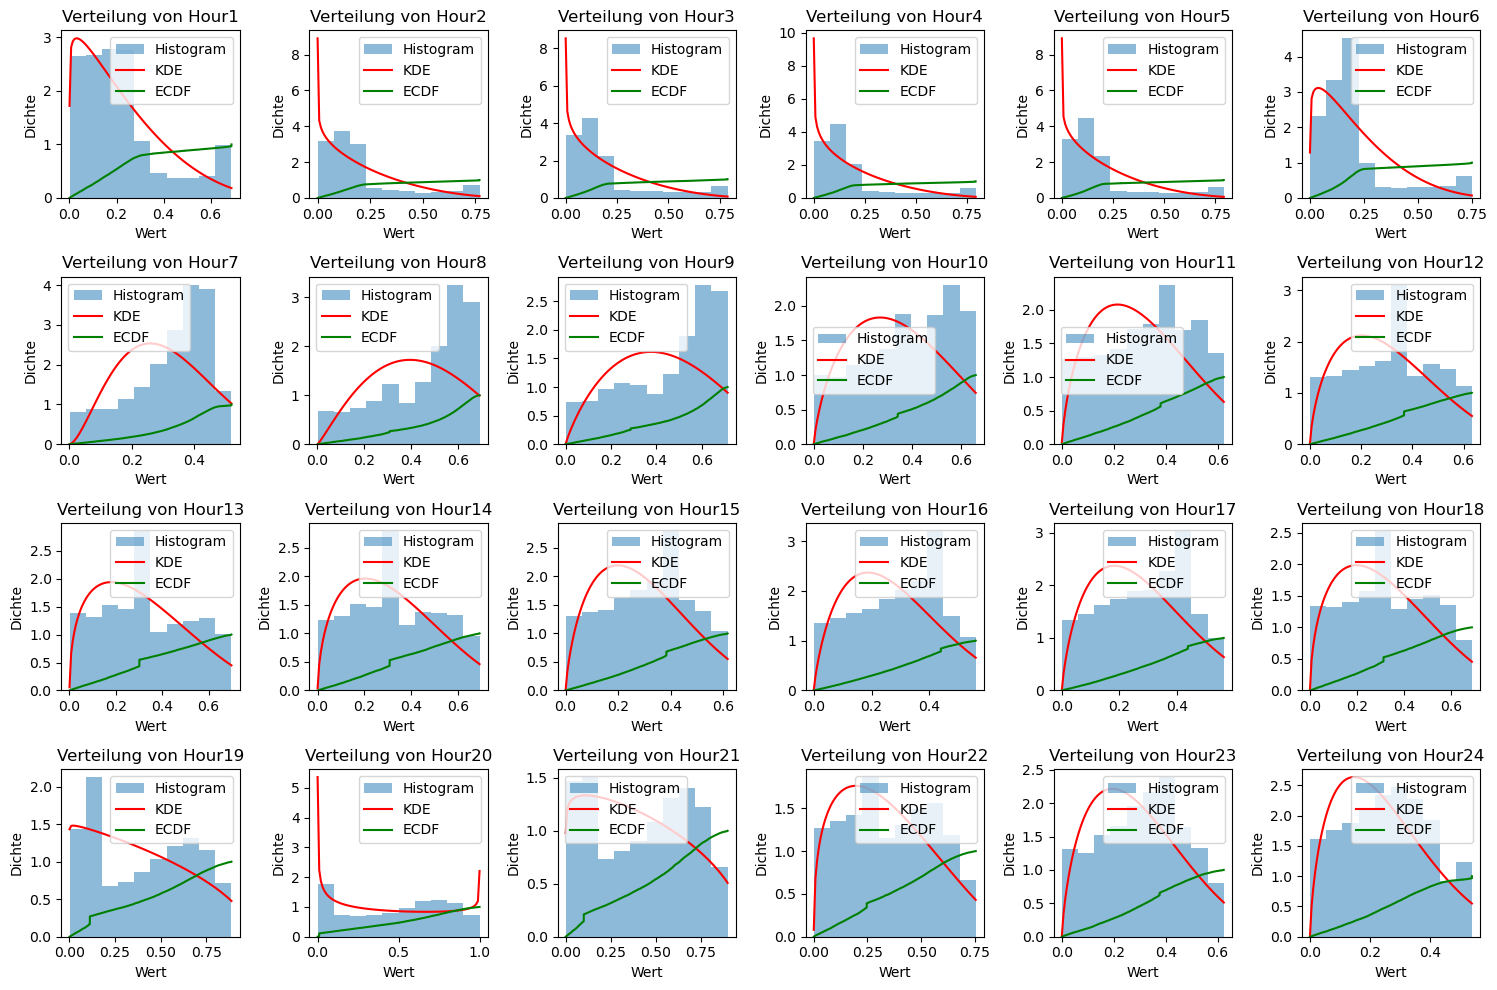

In [26]:
#Beta verteilung verbessert nur positive Werte
import pandas as pd
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check_positive.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Schätzung der Verteilung, Mittelwert und Standardabweichung für jede Spalte
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6
fig, axs = plt.subplots(num_rows, 6, figsize=(15, 2.5 * num_rows))

for i, col in enumerate(df.columns):
    row_idx = i // 6
    col_idx = i % 6
    
    # Schätzung der Verteilung
    params = beta.fit(df[col], floc=0, fscale=1)
    dist = beta(*params)
    
    # Mittelwert und Standardabweichung
    mean = np.mean(df[col])
    std = np.std(df[col])
    
    # Ausgabe der Ergebnisse
    print('Verteilungsschätzung für Spalte {}:'.format(col))
    print('Mittelwert:', mean)
    print('Standardabweichung:', std)
    
    # Histogramm und KDE-Plot
    axs[row_idx, col_idx].hist(df[col], bins=10, density=True, alpha=0.5, label='Histogram')
    x_axis = np.linspace(df[col].min(), df[col].max(), 100)
    axs[row_idx, col_idx].plot(x_axis, dist.pdf(x_axis), 'r-', label='KDE')
    
    # ECDF-Plot
    ecdf_x, ecdf_y = np.sort(df[col]), np.arange(1, len(df[col]) + 1) / len(df[col])
    axs[row_idx, col_idx].plot(ecdf_x, ecdf_y, 'g-', label='ECDF')
    
    # Ausgabe der Formel für die geschätzte Verteilung
    print('Geschätzte Verteilung: Beta-Verteilung mit Parametern a={}, b={}, loc=0, scale=1'.format(*params[0:2]))
    
    # Plot anzeigen
    axs[row_idx, col_idx].legend()
    axs[row_idx, col_idx].set_title('Verteilung von {}'.format(col))
    axs[row_idx, col_idx].set_xlabel('Wert')
    axs[row_idx, col_idx].set_ylabel('Dichte')
    
# Überflüssige Plots entfernen
for i in range(num_cols, num_rows * 6):
    fig.delaxes(axs.flatten()[i])
    
plt.tight_layout()
plt.show()


In [73]:
#'Beste Verteilung für jede Stunde'
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)
df.head()

,Hour1,Hour2,Hour3,Hour4,Hour5,Hour6,Hour7,Hour8,Hour9,Hour10,...,Hour15,Hour16,Hour17,Hour18,Hour19,Hour20,Hour21,Hour22,Hour23,Hour24
0,-0.524526,-0.554062,-0.533124,-0.527807,-0.514516,-0.493987,-0.298349,-0.107820,-0.11962,-0.215453,...,-0.327320,-0.353567,-0.337915,-0.256965,-0.111601,0.004115,-0.056338,-0.174012,-0.267464,-0.409734
1,-0.524216,-0.553878,-0.533085,-0.527506,-0.514361,-0.493691,-0.298105,-0.107723,-0.11962,-0.214740,...,-0.327320,-0.353279,-0.337824,-0.256880,-0.111601,0.004167,-0.056237,-0.173926,-0.267244,-0.409527
2,-0.524205,-0.553008,-0.532559,-0.527506,-0.513723,-0.493691,-0.297772,-0.106849,-0.11962,-0.214368,...,-0.327070,-0.353083,-0.337563,-0.256856,-0.111191,0.004405,-0.056056,-0.173744,-0.266861,-0.408384
3,-0.523845,-0.552484,-0.532511,-0.527506,-0.513723,-0.493585,-0.296983,-0.106744,-0.11962,-0.214368,...,-0.327063,-0.352645,-0.337450,-0.256775,-0.110385,0.004525,-0.055999,-0.173660,-0.266686,-0.407657
4,-0.523483,-0.551930,-0.532284,-0.527046,-0.513054,-0.493350,-0.296613,-0.106526,-0.11962,-0.213902,...,-0.326621,-0.352632,-0.337450,-0.256660,-0.110117,0.004525,-0.055865,-0.173332,-0.266236,-0.407303


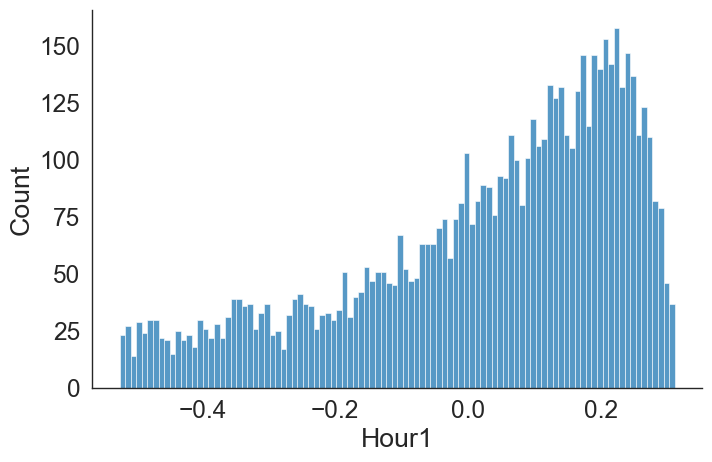

In [74]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df, x="Hour1", kind="hist", bins = 100, aspect = 1.5)

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.59it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
burr,7.727835,70.967891,-43825.702773,0.031936,0.039005,4.819490e-09
beta,44.101406,35.522988,-32485.735639,0.101397,0.107208,1.271524e-65
lognorm,94.111749,95.392033,-27559.236008,0.224663,0.152703,4.968096e-133
norm,94.125804,92.293190,-27567.044970,0.224300,0.153165,7.741174e-134
gamma,102.839134,88.895821,-26981.820587,0.246748,0.166250,9.436358e-158


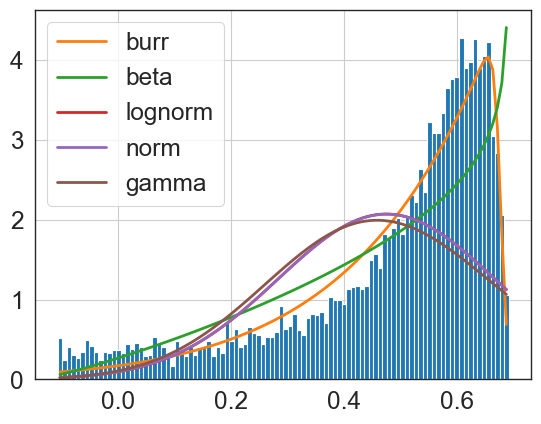

In [84]:
Hour=df['Hour8'].values
f = Fitter(Hour,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#f.get_best(method = 'sumsquare_error')

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.54it/s]


{'burr': {'c': 111.24027411614566, 'd': 0.02146429233362459, 'loc': -0.633209138828426, 'scale': 0.92502690789816}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.07it/s]


{'burr': {'c': 1185087711.8878226, 'd': 0.17951573061192402, 'loc': -41262145.647079766, 'scale': 41262145.82390055}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.56it/s]


{'burr': {'c': 1459509437.663628, 'd': 0.12429814123553756, 'loc': -32407407.24107718, 'scale': 32407407.41639808}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.51it/s]


{'burr': {'c': 406.44117787167346, 'd': 0.03732786766582895, 'loc': -2.6989458613092103, 'scale': 2.8864543087276924}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.73it/s]


{'norm': {'loc': 0.020008785914142548, 'scale': 0.16796338635937247}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.87it/s]


{'burr': {'c': 898405404.886565, 'd': 0.4572324160940799, 'loc': -58806451.21413016, 'scale': 58806451.386979744}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.08it/s]


{'burr': {'c': 1947746893.1992445, 'd': 0.08749689206239106, 'loc': -30625629.64204774, 'scale': 30625630.097917013}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.73it/s]


{'burr': {'c': 432.78199731436735, 'd': 0.027450902412263653, 'loc': -1.9346887294444297, 'scale': 2.612134407736633}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.80it/s]


{'burr': {'c': 100.88340896790963, 'd': 0.03893320993946542, 'loc': -0.4605621527275727, 'scale': 1.159932773104115}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.95it/s]


{'beta': {'a': 1.4688408956319157, 'b': 0.7817838247563987, 'loc': -0.2227849322158396, 'scale': 0.8813423436907484}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.58it/s]


{'burr': {'c': 150.73580937973458, 'd': 0.011131879808815456, 'loc': -0.31219869754059826, 'scale': 0.9255671533882546}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.94it/s]


{'beta': {'a': 1.4740677516145877, 'b': 0.8751378960486459, 'loc': -0.3614236045565091, 'scale': 0.9939032062136766}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.71it/s]


{'beta': {'a': 1.0511693885687035, 'b': 0.9106372315451345, 'loc': -0.30229498589436027, 'scale': 1.0009860029752833}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.56it/s]


{'burr': {'c': 77.41353706634229, 'd': 0.016889272399097568, 'loc': -0.3065460692117111, 'scale': 0.9877407431763456}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.46it/s]


{'beta': {'a': 1.5854188523514274, 'b': 1.0464141186574718, 'loc': -0.3574011836020837, 'scale': 0.9740109047685579}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.81it/s]


{'beta': {'a': 1.5037338631769483, 'b': 0.9951609400440244, 'loc': -0.3686046979913422, 'scale': 0.9290163526291397}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.56it/s]


{'beta': {'a': 2.4580091920293174, 'b': 1.1993772204845963, 'loc': -0.5265381582657147, 'scale': 1.0895386880773907}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.94it/s]


{'beta': {'a': 1.4442995579522333, 'b': 1.0823292322116007, 'loc': -0.26665889086077477, 'scale': 0.9543972305650978}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.85it/s]


{'burr': {'c': 95.1322149543673, 'd': 0.011986201719742386, 'loc': -0.11216749023768507, 'scale': 0.9847686678939185}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.52it/s]


{'burr': {'c': 85.22156500912317, 'd': 0.013503533604864617, 'loc': 0.0036057630688199685, 'scale': 0.9774248050134667}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.81it/s]


{'burr': {'c': 51.1255942569055, 'd': 0.024411523365845095, 'loc': -0.058232155665320924, 'scale': 0.922114383088696}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.38it/s]


{'burr': {'c': 45.491817700184505, 'd': 0.02977408947437618, 'loc': -0.18033435664757302, 'scale': 0.8951690206629909}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.03it/s]


{'burr': {'c': 32.54873251699905, 'd': 0.0491140530904044, 'loc': -0.2899898939575204, 'scale': 0.869430803998477}}


Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.78it/s]


{'burr': {'c': 790136905.8796715, 'd': 0.34618654947666394, 'loc': -58883739.612335265, 'scale': 58883739.930488005}}


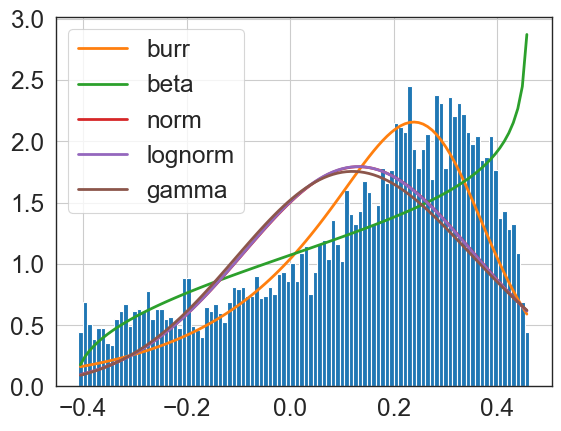

In [79]:
#'Beste Verteilung für jede Stunde mit Parametern'
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

for col in columns:
    # Histogramm plotten
    #sns.set_style('white')
    #sns.set_context("paper", font_scale = 2)
    #sns.displot(data=df, x=col, kind="hist", bins = 100, aspect = 1.5)

    # Verteilung anpassen und Zusammenfassung ausgeben
    data = df[col].values
    f = Fitter(data, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
    f.fit()
    f.summary()
    print(f.get_best(method = 'sumsquare_error'))
    #print(f"Beste Verteilung für Spalte {col}: {f.get_best()}")
    #print(f"Zusammenfassung für Spalte {col}: {f.summary()}\n")

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter

# Pfad zur Excel-Tabelle
path = r'C:\Users\Max Bernecker\IDiNA\Smart_meter_data_sort\check.xlsx'

# Namen der Spalten in der Excel-Tabelle, die du lesen möchtest
columns = ['Hour1','Hour2','Hour3','Hour4','Hour5','Hour6','Hour7','Hour8','Hour9',
           'Hour10','Hour11','Hour12','Hour13','Hour14','Hour15','Hour16','Hour17',
           'Hour18','Hour19','Hour20','Hour21','Hour22','Hour23','Hour24']

# DataFrame erstellen
df = pd.read_excel(path, usecols=columns)

# Bestimmung der besten Verteilung für jede Spalte
best_dists = {}
for col in columns:
    data = df[col].values
    f = Fitter(data, distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
    f.fit()
    if f.get_best() is None:
        print(f'Warning: No best distribution found for column {col}')
    else:
        best_dists[col] = f.get_best()

# Plotten der Verteilungen
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(15, 2.5 * num_rows))
for i, col in enumerate(columns):
    row = i // 6
    col = i % 6
    sns.histplot(data=df, x=df.columns[col], ax=axs[row, col],stat='density')
    x = np.linspace(df[col].min(), df[col].max(), 1000)
    y = df.pdf(x)
    axs[row, col].plot(x, y, color='r', label=dist.name)
    axs[row, col].legend()

plt.show()

Fitting 5 distributions: 100%|███████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.63it/s]

{'Hour1': {'beta': {'a': 0.9702984197336495, 'b': 0.727163757891221, 'loc': -0.6883186313819835, 'scale': 1.0005791660856982}}, 'Hour2': {'beta': {'a': 1.3577654007000168, 'b': 0.7143238333778532, 'loc': -0.7897081944680511, 'scale': 1.0198766850490246}}, 'Hour3': {'beta': {'a': 2.00743119386186, 'b': 0.7866051950614477, 'loc': -0.9008446910200363, 'scale': 1.1119006448461315}}, 'Hour4': {'beta': {'a': 1.8760023585893872, 'b': 0.733888462890094, 'loc': -0.8844003481636927, 'scale': 1.0899055021139294}}, 'Hour5': {'beta': {'a': 1.9752020398447923, 'b': 0.7331714528445779, 'loc': -0.9037124083383281, 'scale': 1.1124600050231326}}, 'Hour6': {'beta': {'a': 2.990870137439241, 'b': 0.8313816288227984, 'loc': -1.0554726745706549, 'scale': 1.3060741180349695}}, 'Hour7': {'lognorm': {'s': 0.001187277238527545, 'loc': -237.73664546040408, 'scale': 237.93938808610415}}, 'Hour8': {'burr': {'c': 2863814633.2818174, 'd': 0.19055680207622755, 'loc': -144166651.56290933, 'scale': 144166652.21705872}},

KeyError: 0

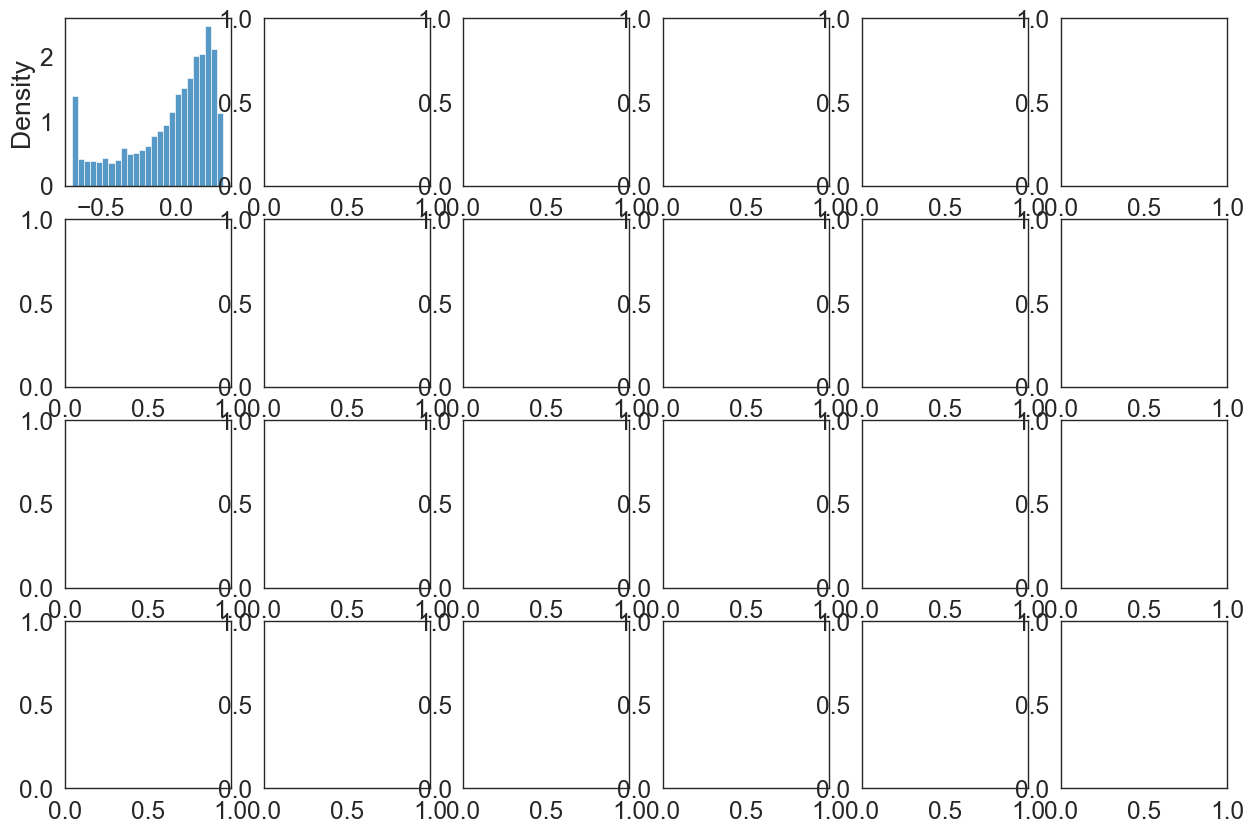

In [59]:
# Plotten der Verteilungen
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(15, 2.5 * num_rows))
for i, col in enumerate(columns):
    row = i // 6
    col = i % 6
    sns.histplot(data=df, x=df.columns[col], ax=axs[row, col],stat='density')
    x = np.linspace(df[col].min(), df[col].max(), 1000)
    y = df.pdf(x)
    axs[row, col].plot(x, y, color='r', label=dist.name)
    axs[row, col].legend()

plt.show()